In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
#https://www.kaggle.com/c/titanic
df = pd.read_csv("Titanic-Dataset.csv")
# Survived - целевая переменная

**Variable	Definition	Key**<br>
survival - Survival(0 = No, 1 = Yes) <br>
pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)<br>
sex - Sex	<br>
Age - Age in years	<br>
sibsp - # of siblings / spouses aboard the Titanic	(братья/сестра)<br>
parch - # of parents / children aboard the Titanic	(дети)<br>
ticket - Ticket number	<br>
fare - Passenger fare (стоимость проезда)	<br>
cabin - Cabin number	<br>
embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>

In [6]:
# 1.
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 2.
df.shape

(891, 12)

In [8]:
# тип столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# дубликаты
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# Проверка на пропуски

In [10]:
# проверка на пропуски
# маска
null_d=df.isnull().sum()
# фильтр
print(null_d[null_d>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


<Axes: >

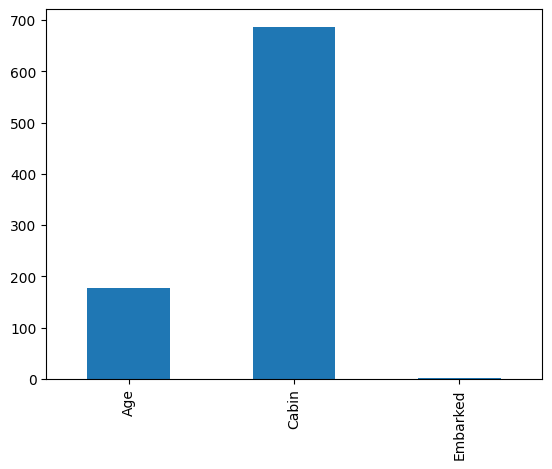

In [11]:
# количество пропусков
null_d[null_d>0].plot(kind='bar')


In [12]:
df.Age=df.Age.fillna(df.Age.mean())
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
print(f"Кол-во данных: {df.shape}")
df.PassengerId.nunique()

Кол-во данных: (891, 12)


891

In [14]:
df.Name.nunique()

891

In [20]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

# Анализ данных

In [15]:
# если есть сильная корреляция между признаками, то признаки можно исключить
num_cols = df.select_dtypes(include='number').columns

corr_matrix = df[num_cols].corr()
corr_matrix


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

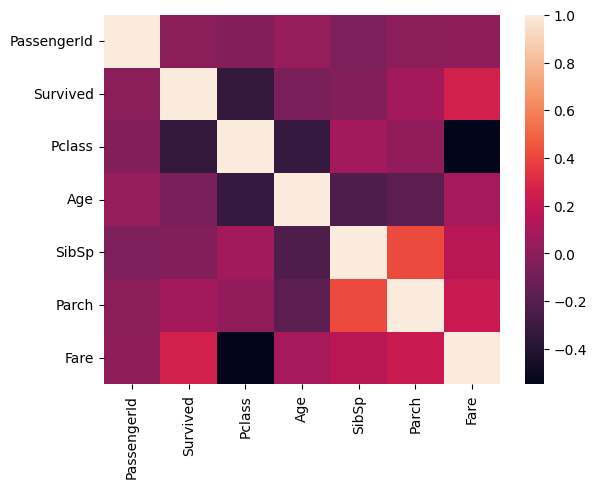

In [16]:
import seaborn as sns

sns.heatmap(corr_matrix)

In [24]:
# баланс классов
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2d2760e1910>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'Not Survived'),
  Text(0.4919455057964525, -0.9838646346559433, 'Survived')])

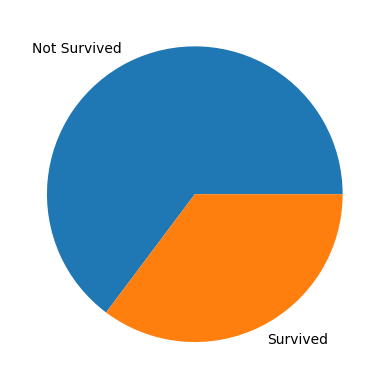

In [22]:
import  matplotlib.pyplot as plt

plt.pie(df.Sex.value_counts(),labels = ['Not Survived', 'Survived'])

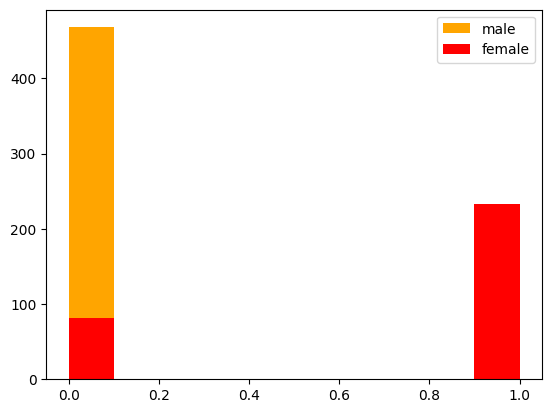

In [33]:
plt.hist(x=df[df['Sex']=='male']['Survived'], color='orange',label='male')
plt.hist(x=df[df['Sex']=='female']['Survived'], color='red',label='female')
plt.legend()

In [39]:
grouped_by_pclass_data = df.Survived.groupby(df.Pclass).value_counts()
grouped_by_pclass_data

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

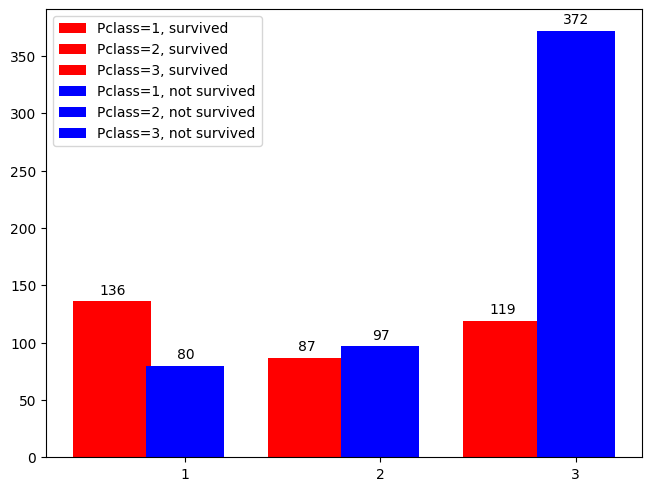

In [77]:
fig, ax = plt.subplots(layout='constrained')
w = 0.25
for cls in range(3):
    data = df[(df['Pclass']==cls+1)&(df['Survived']==1)]['Survived'].value_counts().sum()
    rects = ax.bar(w, data, color='red', label=f"Pclass={cls+1}, survived")
    ax.bar_label(rects, padding=3)
    w+=2
w = 1
for cls in range(3):
    data = df[(df['Pclass']==cls+1)&(df['Survived']==0)]['Survived'].value_counts().sum()
    rects = ax.bar(w, data, color='blue', label=f"Pclass={cls+1}, not survived")
    ax.bar_label(rects, padding=3)
    w+=2
ax.set_xticks((1,3,5), ("1", "2", "3"))
plt.legend()

In [22]:
age=df.Age.groupby(df.Survived).value_counts()
age

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          18.000000     17
          25.000000     17
                      ... 
1         43.000000      1
          47.000000      1
          53.000000      1
          55.000000      1
          80.000000      1
Name: count, Length: 144, dtype: int64

In [18]:
df[df['Survived']==1]['Age'].max()

80.0

In [19]:
df[df['Survived']==0]['Age'].max()

74.0

In [26]:
df[df['Survived']==0]['Age'].mode()

0    29.699118
Name: Age, dtype: float64

In [25]:
df[df['Survived']==1]['Age'].mode()

0    29.699118
Name: Age, dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

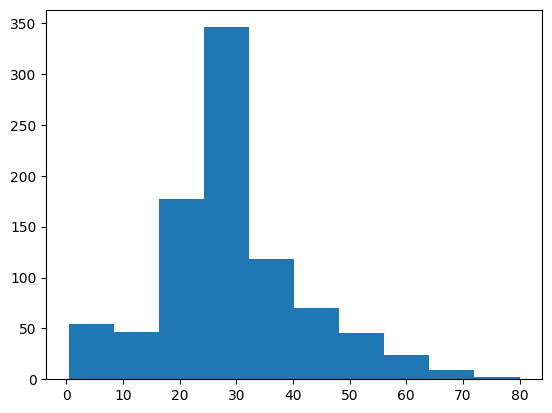

In [48]:
plt.hist(x=df['Age'])

<Axes: ylabel='count'>

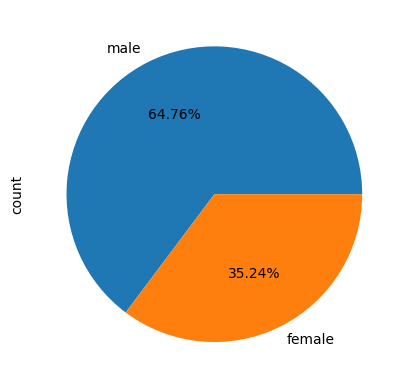

In [26]:
df.Sex.value_counts().plot.pie(autopct='%.2f%%')


<Axes: ylabel='count'>

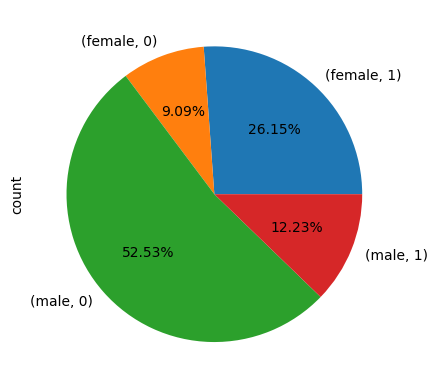

In [23]:
gpsex=df.Survived.groupby(df.Sex).value_counts()
gpsex.plot.pie(autopct='%.2f%%')

# Очистка данных


# Преобразование данных


In [ ]:
# кодируем 0 и 1 пол пассажира
data=pd.get_dummies(df['Sex'],drop_first=True)
data=data.astype('int64')
data.sample(3)

,male
472,0
819,1
697,0


In [31]:
df=pd.concat([df,data],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,male
0,0,3,male,22.000000,1,0,1
1,1,1,female,38.000000,1,0,0
2,1,3,female,26.000000,0,0,0
3,1,1,female,35.000000,1,0,0
4,0,3,male,35.000000,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,1
887,1,1,female,19.000000,0,0,0
888,0,3,female,29.699118,1,2,0
889,1,1,male,26.000000,0,0,1


In [32]:
df.drop('Sex',axis=1,inplace = True )

In [33]:
df.rename(columns={'male':'gender'})


,Survived,Pclass,Age,SibSp,Parch,gender
0,0,3,22.000000,1,0,1
1,1,1,38.000000,1,0,0
2,1,3,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,0,3,35.000000,0,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,1
887,1,1,19.000000,0,0,0
888,0,3,29.699118,1,2,0
889,1,1,26.000000,0,0,1


# Признаки и целевая переменная


In [35]:
# признаки
x=df.drop('Survived',axis=1)
# целевая переменная
y=df.Survived

In [36]:
x.shape,y.shape

((891, 5), (891,))

# Разделение на тестовые и тренировочные


In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42,shuffle=True)